In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import scipy.stats as st
import scipy.ndimage as nd
import scipy.signal as sg
%matplotlib inline

def init(filename):
    file=sio.loadmat(filename) #On charge le fichier
    Nbobjets = int(max(file['objs_link'][3]))
    print("On a tracqué "+str(Nbobjets)+" particules")
    return file,Nbobjets

In [59]:
file, Nb=init("results/andre_3_3.mat")
frequence=200
binning=4
agrandissement=20*1.5
def taketheta(i):
    """La fonction qui tracque la particule i"""
    theta=file['objs_link'][8,:][np.where(file['objs_link'][5,:]==i)]
    dureetrajectoire=theta.shape[0]
    print("Trajectory acquired for particle "+str(i))
    T=np.arange(dureetrajectoire)/frequence
    if dureetrajectoire>0:
        return theta-theta.mean(),T,dureetrajectoire
    else:
        return [0],T,dureetrajectoire
def take(i,binning,agrandissement,frequence):
    """La fonction qui tracque la particule i"""
    PixelSize=binning*(6450/agrandissement)*1e-3 # en um
    x1=file['objs_link'][0,:][np.where(file['objs_link'][5,:]==i)]*PixelSize
    y1 = file['objs_link'][1,:][np.where(file['objs_link'][5,:]==i)]*PixelSize
    dureetrajectoire=x1.shape[0]
    print("Trajectory acquired for particle "+str(i))
    T=np.arange(dureetrajectoire)/frequence
    if dureetrajectoire>0:
        return x1-x1[0],y1-y1[0],T,dureetrajectoire
    else:
        return [0],[0],T,dureetrajectoire

On a tracqué 1 particules


In [60]:
i=1
theta,T,N=taketheta(i)
x,y,T,N=take(i,binning,agrandissement,frequence)

Trajectory acquired for particle 1
Trajectory acquired for particle 1


In [61]:
thetajump=theta[1:]-theta[:-1]
thetajump*=np.abs(thetajump)>1
#thetajump[np.where(thetajump!=0)]/=np.abs(thetajump[np.where(thetajump!=0)])
thetajumped=np.zeros_like(theta)
Pos=False
Jump=False
Last=False
for i in range(N-2):
    if not Jump and thetajump[i]>0:
        Pos=True
        Jump=True
    elif not Jump and thetajump[i]<0:
        Jump=True
    elif Jump and thetajump[i]!=0:
        Last=True
        Jump=False
        Pos=False
    if Pos:
        thetajumped[i+1]=1
        thetajumped[i+2]=1
        First=False
    elif Jump:
        thetajumped[i+1]=-1
        thetajumped[i+2]=-1
        First=False
    if Last:
        thetajumped[i+1]=0
        Last=False
theta-=thetajumped*np.pi

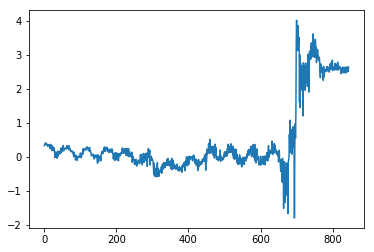

In [62]:
#plt.plot(thetajump[:100])
#plt.plot(thetajumped[:100])
theta=theta[:-1]
plt.plot(theta)

In [56]:
xs,ys=nd.gaussian_filter(x,2),nd.gaussian_filter(y,2)
dxs=xs[1:]-xs[:-1]
dys=ys[1:]-ys[:-1]
thetas=np.angle(dxs+1j*dys)
theta-=thetas
theta-=theta.mean()
plt.plot(theta)

ValueError: operands could not be broadcast together with shapes (844,) (845,) (844,) 

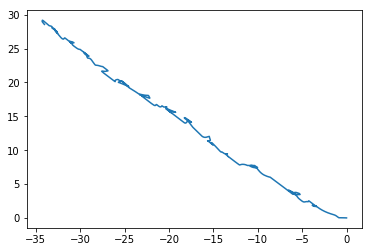

In [57]:
plt.plot(xs,ys)

In [58]:
def autocorr(x,formsd=False):
    fftx = np.fft.fft(x, n=(x.shape[0]*2-1), axis=0)
    cfftx=np.conjugate(fftx)
    ret = np.real(np.fft.ifft(fftx*cfftx, axis=0))
    result = np.fft.fftshift(ret, axes=0)
    result = np.correlate(x, x, mode='full')
    if formsd:
        N=result.size//2+1
        return result[result.size//2:]/(N-np.arange(0,N))
    return result[result.size//2:]

In [24]:
auto=autocorr(theta)

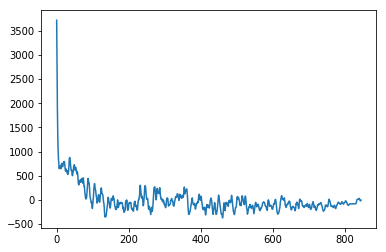

In [25]:
plt.plot(auto)

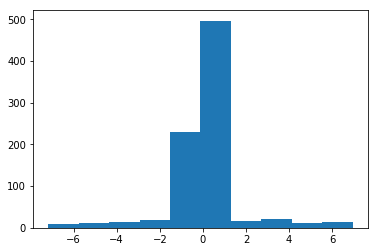

In [31]:
dtheta=theta[1:]-theta[:-1]
b=plt.hist(dtheta,10)

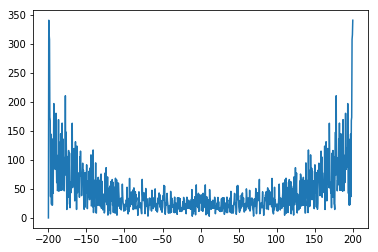

In [30]:
fourrier=np.fft.fft(theta)
freq = np.sort(np.fft.fftfreq(theta.shape[0], d=1/frequence))
plt.plot(freq,np.abs(fourrier))

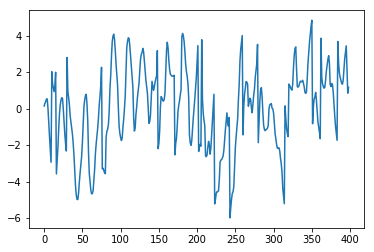

In [28]:
plt.plot(theta)

In [ ]:
Nbo